# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division
import math

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [3]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [4]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [5]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [6]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [7]:
pregordr[0]

1

Select a slice from a column.

In [8]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [9]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [10]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [11]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [12]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [13]:
preg['birthord'].value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [14]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [15]:
preg['prglngth']

0        39
1        39
2        39
3        39
4        39
         ..
13588    39
13589     6
13590     5
13591    39
13592    39
Name: prglngth, Length: 13593, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [16]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [17]:
preg['totalwgt_kg'] = preg['totalwgt_lb']*0.453592

In [18]:
preg['totalwgt_kg']

0        3.997279
1        3.572037
2        4.139027
3        3.175144
4        2.806601
           ...   
13588    2.806601
13589         NaN
13590         NaN
13591    3.401940
13592    3.401940
Name: totalwgt_kg, Length: 13593, dtype: float64

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [19]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [20]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [21]:
## the youngest is 15 and oldest is 44
resp['age_r'].value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [22]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [23]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with `caseid` 1?

In [24]:
## the person with caseid 1 is 44 years old.
one_persons_data = resp[resp.caseid==1]
one_persons_data["age_r"]

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?


In [25]:
one_persons_data = preg[preg.caseid==2298]
one_persons_data["prglngth"]

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [26]:
## It turns out the person with caseid 5012 only had the one child. The baby was 6.0 lbs.
one_persons_data = preg[preg.caseid == 5012]
one_persons_data["birthwgt_lb"]

5515    6.0
Name: birthwgt_lb, dtype: float64

In [27]:
## testing chapter 2 ideas.
## It seemed to work but we may need to remove Null values. Pressing on!
hist = {}
for x in preg.birthwgt_lb:
    hist[x] = hist.get(x,0)+1

## I used this to check my work but it spams nans so I commented it out
# hist

In [28]:
## kind of an elegant way of doing this. Seems to get the same results.
from collections import Counter
counter = Counter(preg.birthwgt_lb)

## Since this was practice I commented this out so I would not spam nans :)
#counter

In [29]:
## looks like thinkstats2 ignored the null values.
import thinkstats2
hist = thinkstats2.Hist(preg.birthwgt_lb)

## Same with this one I commented it out so my code would be more readable.
# hist

In [30]:
## this looks like it checks the frequencies based on the weight I put in.
## So in this case I tried 6 lbs which was the same weight that caseid = 5012 had
## It turns out that there were 2223 babies that also had this weight.
hist.Freq(6)



2223

In [31]:
## Lets check something impossible and see what we get.
## Confirmed there were no babies that weighed 100 lbs.
hist.Freq(100)


0

In [32]:
## Since this is a dictionary this gives me the values stored in the dictionary.
hist.Values()


dict_keys([7.0, 6.0, 8.0, 5.0, 9.0, 4.0, 10.0, 3.0, 2.0, 1.0, 11.0, 12.0, 0.0, 13.0, 14.0, 15.0])

In [33]:
## Very cool this is starting to look like a histogram.
for val in sorted(hist.Values()):
    print(val,hist.Freq(val))



0.0 8
1.0 40
2.0 53
3.0 98
4.0 229
5.0 697
6.0 2223
7.0 3049
8.0 1889
9.0 623
10.0 132
11.0 26
12.0 10
13.0 3
14.0 3
15.0 1


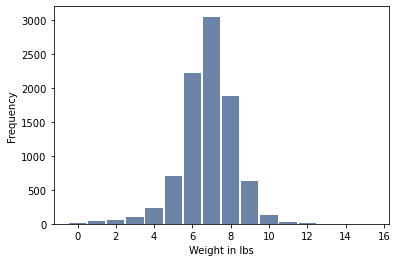

<Figure size 576x432 with 0 Axes>

In [34]:
## Awesome we got a histogram that looks fairly normal.
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'Weight in lbs', ylabel='Frequency')



In [35]:
## following the book I already imported the data and made a column with weights in lb
## this must be used to ensure that we are not building bias into our histogram since babies that die are most likely underweight. :(
live=preg[preg.prgoutcome==1]



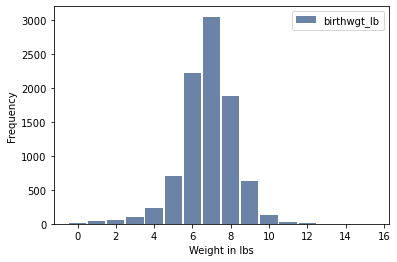

<Figure size 576x432 with 0 Axes>

In [36]:
## Interesting it looks very similar to what I got before but I did not filter for live births.
## I changed my variable to hist2 just to be sure
hist_birthwgt_lb = thinkstats2.Hist(live.birthwgt_lb,label= 'birthwgt_lb')
thinkplot.Hist(hist_birthwgt_lb)
thinkplot.Show(xlabel='Weight in lbs', ylabel = 'Frequency')

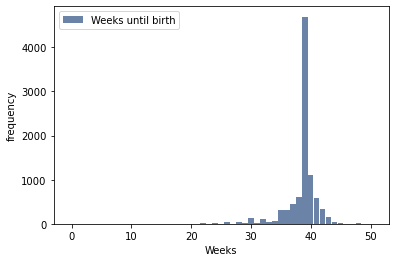

<Figure size 576x432 with 0 Axes>

In [37]:
## The author brings up a good point outliers would be easy to miss on a frequency graph.
## here is the original with with outliers still in the histogram
hist_prgLngth = thinkstats2.Hist(live.prglngth,label="Weeks until birth")
thinkplot.Hist(hist_prgLngth)
thinkplot.Show(xlabel = 'Weeks', ylabel = 'frequency')

In [38]:
## Checking for outliers
for weeks, freq in hist_prgLngth.Smallest(10):
    print(weeks, freq)


0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


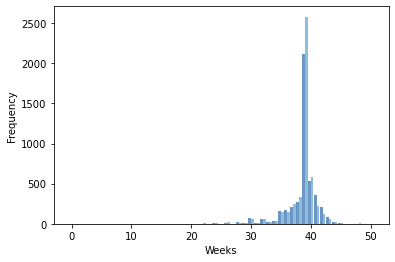

<Figure size 576x432 with 0 Axes>

In [39]:
## now we are making a list of the babies who were either first borns or not
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

## building two histograms one will be a histogram for first borns the other will contain all others.
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

## plotting on the same axis so we can compare them.
## I made an observation here that the histograms are hard to read due to a difference in sample size.
## The book confirms that this is an issue that we should be concerned with.
## Maybe we will use density functions to solve this?
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align = 'right', width=width)
thinkplot.Hist(other_hist,align='left', width=width)
thinkplot.Show(xlabel='Weeks', ylabel = 'Frequency')

In [40]:
## Computing the mean, standard deviation and variance
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()



In [41]:
## We need to find the effect size using Cohens effect size
def CohenEffectSize(group1,group2):
    diff = group1.mean()-group2.mean()

    var1 = group1.var()
    var2 = group2.var()

    n1,n2 = len(group1),len(group2)

    pooled_var =(n1*var1+n2*var2)/(n1+n2)
    d = diff/math.sqrt(pooled_var)
    return d

In [45]:
## testing it out
## It worked! The book said that he got .029 which is not much of a difference!
effect_size = CohenEffectSize(firsts['prglngth'],others['prglngth'])
print(effect_size)
## This is very interesting since the effect size is in standard deviations it is saying that the difference is slightly larger than the mean.
# But there is not a noticeable difference in fact I would say that first born babies are born very close to the average time.
## According to the the wiki and confirmed on other websites we make decisions on effect size based on these metrics.
## very small (0.01) small (0.2) medium (0.5) large (0.8) Very Large (1.20) Huge (2.0)
## as we can see since our effect size was 0.029 we would fall between very small and small.
# So I would say that there is a small chance that the baby would be born later than a normal
# If the baby was their first baby there may be a small chance according to those metrics that the baby would slightly late.

0.028879044654449834
Firsts:0        39
2        39
5        38
8        39
10       39
         ..
13576    39
13578    39
13581    39
13584    34
13588    39
Name: prglngth, Length: 4413, dtype: int64
1        39
3        39
4        39
6        40
7        42
         ..
13572    39
13574    39
13579    39
13591    39
13592    39
Name: prglngth, Length: 4735, dtype: int64
